## CNN Architecture Selection for CIFAR-10 Dataset

This notebook provides a basic framework to choose the best architecture (in terms of validation accuracy) by iterating on and adjusting various hyperparameters of the model for CIFAR-10 dataset.  <br>
<br>

Notations used in this notebook:

32C4: A convolution layer with 32 feature maps with a filter or kernel size of 4x4, and stride 2

P2: Represents a MaxPool layer of filter 2x2 and stride 2<br>

<br>

We will go over following iterations and choose the best hyperparameter in each iteration:

1. Number of Convolutional-subsampling pairs
2. Number of Feature Maps
3. Number of Dense Layer
4. Dropout Value


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_test.shape

(10000, 32, 32, 3)

### Preprocessing

#### Rescaling

In [4]:
#Rescaling

x_train = x_train/255
x_test = x_test/255

#### One Hot Encoding

In [5]:
#Transforming y to categorical variable

from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

In [20]:
# Model Building

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [7]:
x_train.shape

(50000, 32, 32, 3)

### 1. Choosing the number of Convolutional-subsampling pair

We will test the following pairs:

1. 3072 -> [32C4-P2] -> 256 -> 10
2. 3072 -> [32C4-P2] -> [48C4-P2] -> 256 -> 10
3. 3072 -> [32C4-P2] -> [48C4-P2] -> [64C4-P2] -> 256 -> 10

In [8]:
networks = 3
model = [0] * networks

for i in range(3):
    model[i] = Sequential()
    model[i].add(Conv2D(32, kernel_size = 4, input_shape = (32,32,3), activation = "relu"))
    model[i].add(MaxPool2D(pool_size=(2,2)))
    
    if i>0:
        model[i].add(Conv2D(48, kernel_size = 4, input_shape = (32,32,3), activation = "relu"))
        model[i].add(MaxPool2D(pool_size=(2,2)))
        
    if i>1:
        model[i].add(Conv2D(64, kernel_size = 4, input_shape = (32,32,3), activation = "relu"))
        model[i].add(MaxPool2D(pool_size=(2,2)))
    
    model[i].add(Flatten())
    model[i].add(Dense(256,activation = "relu"))
    model[i].add(Dense(10,activation = "softmax"))
    
    model[i].compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = "val_loss", patience = 3)

In [30]:
for i in range(3):
    history[i]: model[i].fit(x_train,y_train_cat,
                validation_data=(x_test,y_test_cat),
                epochs = 50,
                batch_size = 80,
                callbacks = [early_stop])

Epoch 1/50
625/625 [==============================] - 36s 57ms/step - loss: 0.1455 - accuracy: 0.9563 - val_loss: 1.7165 - val_accuracy: 0.6419
Epoch 2/50
625/625 [==============================] - 27s 43ms/step - loss: 0.1242 - accuracy: 0.9635 - val_loss: 1.8181 - val_accuracy: 0.6371
Epoch 3/50
625/625 [==============================] - 28s 45ms/step - loss: 0.1000 - accuracy: 0.9712 - val_loss: 1.9393 - val_accuracy: 0.6389
Epoch 4/50
625/625 [==============================] - 28s 45ms/step - loss: 0.0874 - accuracy: 0.9750 - val_loss: 2.0366 - val_accuracy: 0.6353
Epoch 1/50
625/625 [==============================] - 44s 70ms/step - loss: 0.1964 - accuracy: 0.9350 - val_loss: 1.3796 - val_accuracy: 0.6881
Epoch 2/50
625/625 [==============================] - 46s 74ms/step - loss: 0.1642 - accuracy: 0.9456 - val_loss: 1.4585 - val_accuracy: 0.6937
Epoch 3/50
625/625 [==============================] - 52s 84ms/step - loss: 0.1438 - accuracy: 0.9520 - val_loss: 1.5619 - val_accuracy:

Validation Accuracy of Single Pair = 0.6155999898910522
Validation Accuracy of 2 Pairs = 0.6674000024795532
Validation Accuracy of 3 Pairs = 0.6748999953269958


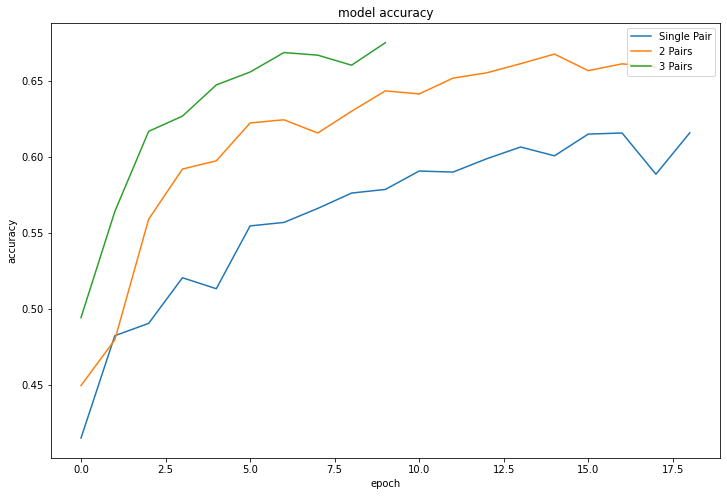

In [274]:
plt.figure(figsize = (12,8))
names = ["Single Pair","2 Pairs","3 Pairs"]
for i in range(3):
    print("Validation Accuracy of", names[i],"=",max(pd.DataFrame(model[i].history.history)["val_accuracy"]))
    pd.DataFrame(model[i].history.history)["val_accuracy"].plot()
    plt.legend(names, loc='upper right')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    

##### It looks like the third model with three convolutional and max-pooling layers performed slightly better than the other two models

##### Now test different values of feature maps for the 3-pair model we chose from the previous step

### 2. Choosing the number of Feature Maps


Let's test the following:
- 3072 -> [8C4-P2] -> [16C4-P2] -> [32C4-P2] -> 256 -> 10
- 3072 -> [16C4-P2] -> [32C4-P2] -> [64C4-P2] -> 256 -> 10
- 3072 -> [24C4-P2] -> [48C4-P2] -> [96C4-P2] -> 256 -> 10
- 3072 -> [32C4-P2] -> [64C4-P2] -> [128C4-P2] -> 256 -> 10
- 3072 -> [40C4-P2] -> [80C4-P2] -> [160C4-P2] -> 256 -> 10
- 3072 -> [48C4-P2] -> [96C4-P2] -> [192C4-P2] -> 256 -> 10


In [275]:
networks = 6
model = [0] * networks

for i in range(6):
    model[i] = Sequential()
    model[i].add(Conv2D(i*8+8, kernel_size = 4, input_shape = (32,32,3), activation = "relu"))
    model[i].add(MaxPool2D(pool_size=(2,2)))
    
    model[i].add(Conv2D(i*16+16, kernel_size = 4, activation = "relu"))
    model[i].add(MaxPool2D(pool_size=(2,2)))
    
    model[i].add(Conv2D(i*32+32, kernel_size = 4, activation = "relu"))
    model[i].add(MaxPool2D(pool_size=(2,2)))

    
    model[i].add(Flatten())
    model[i].add(Dense(256,activation = "relu"))
    model[i].add(Dense(10,activation = "softmax"))
    
    model[i].compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [276]:
for i in range(6):
    model[i].fit(x_train, y_train_cat, 
                 validation_data=(x_test,y_test_cat),
                 epochs = 30,
                 batch_size = 80,
                 callbacks=[early_stop])

Epoch 1/30
625/625 [==============================] - 30s 45ms/step - loss: 1.7966 - accuracy: 0.3381 - val_loss: 1.5570 - val_accuracy: 0.4245
Epoch 2/30
625/625 [==============================] - 28s 45ms/step - loss: 1.5096 - accuracy: 0.4471 - val_loss: 1.4966 - val_accuracy: 0.4576
Epoch 3/30
625/625 [==============================] - 24s 38ms/step - loss: 1.4027 - accuracy: 0.4901 - val_loss: 1.3634 - val_accuracy: 0.5040
Epoch 4/30
625/625 [==============================] - 24s 38ms/step - loss: 1.3185 - accuracy: 0.5250 - val_loss: 1.3387 - val_accuracy: 0.5235
Epoch 5/30
625/625 [==============================] - 24s 38ms/step - loss: 1.2627 - accuracy: 0.5475 - val_loss: 1.2744 - val_accuracy: 0.5469
Epoch 6/30
625/625 [==============================] - 24s 38ms/step - loss: 1.2155 - accuracy: 0.5695 - val_loss: 1.2121 - val_accuracy: 0.5683
Epoch 7/30
625/625 [==============================] - 24s 38ms/step - loss: 1.1841 - accuracy: 0.5812 - val_loss: 1.1801 - val_accuracy:

Validation Accuracy of 8 Maps = 0.5993000268936157
Validation Accuracy of 16 Maps = 0.6725000143051147
Validation Accuracy of 24 Maps = 0.6877999901771545
Validation Accuracy of 32 Maps = 0.6966999769210815
Validation Accuracy of 40 Maps = 0.70169997215271
Validation Accuracy of 48 Maps = 0.7006999850273132


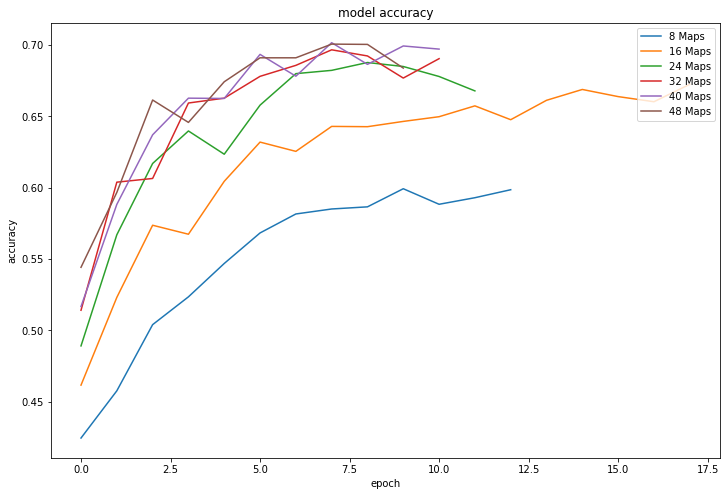

In [277]:
plt.figure(figsize = (12,8))
names = ["8 Maps","16 Maps","24 Maps","32 Maps","40 Maps","48 Maps"]
for i in range(6):
    print("Validation Accuracy of", names[i],"=",max(pd.DataFrame(model[i].history.history)["val_accuracy"]))
    pd.DataFrame(model[i].history.history)["val_accuracy"].plot()
    plt.legend(names, loc='upper right')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')

#### It appears that the model with [40C4-P2] -> [80C4-P2] -> [160C4-P2] layers had the highest validation accuracy, 70.2%, as compared to the rest. The difference was not so large between the models though.

### 3. Choosing the number of Dense Layers

#### We will now choose different values for the Dense layer and find out which one has the best performance overall. We will test following values for the number of Dense layer:

- 3072 -> [40C4-P2] -> [80C4-P2] -> [160C4-P2] -> 0 -> 10
- 3072 -> [40C4-P2] -> [80C4-P2] -> [160C4-P2] -> 16 -> 10
- 3072 -> [40C4-P2] -> [80C4-P2] -> [160C4-P2] -> 32 -> 10
- 3072 -> [40C4-P2] -> [80C4-P2] -> [160C4-P2] -> 64 -> 10
- 3072 -> [40C4-P2] -> [80C4-P2] -> [160C4-P2] -> 128 -> 10
- 3072 -> [40C4-P2] -> [80C4-P2] -> [160C4-P2] -> 256 -> 10
- 3072 -> [40C4-P2] -> [80C4-P2] -> [160C4-P2] -> 512 -> 10
- 3072 -> [40C4-P2] -> [80C4-P2] -> [160C4-P2] -> 1024 -> 10

In [279]:
networks = 8
model = [0] * networks

for i in range(8):
    model[i] = Sequential()
    model[i].add(Conv2D(40, kernel_size = 4, input_shape = (32,32,3), activation = "relu"))
    model[i].add(MaxPool2D(pool_size=(2,2)))
    
    model[i].add(Conv2D(80, kernel_size = 4, activation = "relu"))
    model[i].add(MaxPool2D(pool_size=(2,2)))
    
    model[i].add(Conv2D(160, kernel_size = 4, activation = "relu"))
    model[i].add(MaxPool2D(pool_size=(2,2)))
        
    
    model[i].add(Flatten())
    if i>0:
        model[i].add(Dense(2**(i+3),activation = "relu"))
    model[i].add(Dense(10,activation = "softmax"))
    
    model[i].compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [280]:
for i in range(8):
    model[i].fit(x_train, y_train_cat, 
                 validation_data=(x_test,y_test_cat),
                 epochs = 30,
                 batch_size = 80,
                 callbacks=[early_stop])

Epoch 1/30
625/625 [==============================] - 85s 132ms/step - loss: 1.5576 - accuracy: 0.4315 - val_loss: 1.2861 - val_accuracy: 0.5402
Epoch 2/30
625/625 [==============================] - 70s 112ms/step - loss: 1.2069 - accuracy: 0.5757 - val_loss: 1.1260 - val_accuracy: 0.6117
Epoch 3/30
625/625 [==============================] - 72s 115ms/step - loss: 1.0633 - accuracy: 0.6321 - val_loss: 1.0792 - val_accuracy: 0.6237
Epoch 4/30
625/625 [==============================] - 518s 829ms/step - loss: 0.9504 - accuracy: 0.6730 - val_loss: 1.0163 - val_accuracy: 0.6539
Epoch 5/30
625/625 [==============================] - 72s 115ms/step - loss: 0.8585 - accuracy: 0.7067 - val_loss: 0.9452 - val_accuracy: 0.6773
Epoch 6/30
625/625 [==============================] - 67s 107ms/step - loss: 0.7978 - accuracy: 0.7261 - val_loss: 0.9432 - val_accuracy: 0.6852
Epoch 7/30
625/625 [==============================] - 70s 112ms/step - loss: 0.7300 - accuracy: 0.7511 - val_loss: 0.9371 - val_a

Validation Accuracy of 0 Dense Layer = 0.6984999775886536
Validation Accuracy of 16 Dense Layers = 0.6855999827384949
Validation Accuracy of 32 Dense Layers = 0.6984999775886536
Validation Accuracy of 64 Dense Layers = 0.6963000297546387
Validation Accuracy of 128 Dense Layers = 0.6984999775886536
Validation Accuracy of 256 Dense Layers = 0.7081999778747559
Validation Accuracy of 512 Dense Layers = 0.7002999782562256
Validation Accuracy of 1024 Dense Layers = 0.6944000124931335


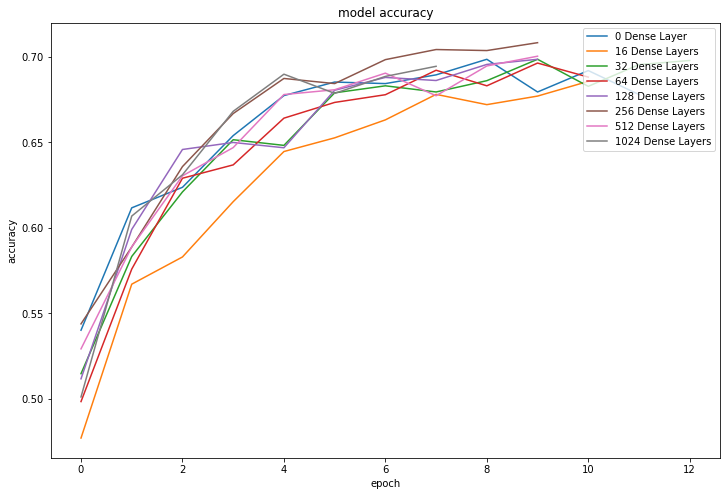

In [281]:
plt.figure(figsize = (12,8))
names = ["0 Dense Layer","16 Dense Layers","32 Dense Layers","64 Dense Layers","128 Dense Layers",
         "256 Dense Layers", "512 Dense Layers", "1024 Dense Layers"]
for i in range(8):
    print("Validation Accuracy of", names[i],"=",max(pd.DataFrame(model[i].history.history)["val_accuracy"]))
    pd.DataFrame(model[i].history.history)["val_accuracy"].plot()
    plt.legend(names, loc='upper right')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')

#### As we can see from the output above, the model with 256 Dense layers was able to take the accuracy further up to 70.8%, a slight improvement over the previous model 

### 4. Choosing the Dropout value

We will run our winner model from the previous step on following Dropout values and determine if we are able to jack up the validation accuracy - 0.1, 0.2, 0.3, 0.4, 0.5, 0.6

In [283]:
from tensorflow.keras.layers import Dropout
networks = 6
model = [0] * networks

for i in range(6):
    model[i] = Sequential()
    model[i].add(Conv2D(40, kernel_size = 4, input_shape = (32,32,3), activation = "relu"))
    model[i].add(MaxPool2D(pool_size=(2,2)))
    model[i].add(Dropout(i*0.1))
    
    model[i].add(Conv2D(80, kernel_size = 4, activation = "relu"))
    model[i].add(MaxPool2D(pool_size=(2,2)))
    model[i].add(Dropout(i*0.1))    
    
    model[i].add(Conv2D(160, kernel_size = 4, activation = "relu"))
    model[i].add(MaxPool2D(pool_size=(2,2)))
    model[i].add(Dropout(i*0.1))
    
    model[i].add(Flatten())
    
    model[i].add(Dense(256,activation = "relu"))
    model[i].add(Dropout(i*0.1))
    model[i].add(Dense(10,activation = "softmax"))
    
    model[i].compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [284]:
for i in range(6):
    model[i].fit(x_train, y_train_cat, 
                 validation_data=(x_test,y_test_cat),
                 epochs = 30,
                 batch_size = 80,
                 callbacks=[early_stop])

Epoch 1/30
625/625 [==============================] - 73s 115ms/step - loss: 1.5972 - accuracy: 0.4124 - val_loss: 1.3666 - val_accuracy: 0.5061
Epoch 2/30
625/625 [==============================] - 66s 105ms/step - loss: 1.2237 - accuracy: 0.5628 - val_loss: 1.1600 - val_accuracy: 0.5860
Epoch 3/30
625/625 [==============================] - 67s 107ms/step - loss: 1.0465 - accuracy: 0.6314 - val_loss: 1.0272 - val_accuracy: 0.6379
Epoch 4/30
625/625 [==============================] - 67s 107ms/step - loss: 0.9283 - accuracy: 0.6744 - val_loss: 0.9475 - val_accuracy: 0.6681
Epoch 5/30
625/625 [==============================] - 68s 109ms/step - loss: 0.8428 - accuracy: 0.7062 - val_loss: 0.9220 - val_accuracy: 0.6807
Epoch 6/30
625/625 [==============================] - 695s 1s/step - loss: 0.7681 - accuracy: 0.7301 - val_loss: 0.8947 - val_accuracy: 0.6939
Epoch 7/30
625/625 [==============================] - 80s 127ms/step - loss: 0.6979 - accuracy: 0.7571 - val_loss: 0.9041 - val_accu

Validation Accuracy of Dropout = 0.1 = 0.695900022983551
Validation Accuracy of Dropout = 0.2 = 0.72079998254776
Validation Accuracy of Dropout = 0.3 = 0.7390000224113464
Validation Accuracy of Dropout = 0.4 = 0.7268999814987183
Validation Accuracy of Dropout = 0.5 = 0.6965000033378601
Validation Accuracy of Dropout = 0.6 = 0.6848999857902527


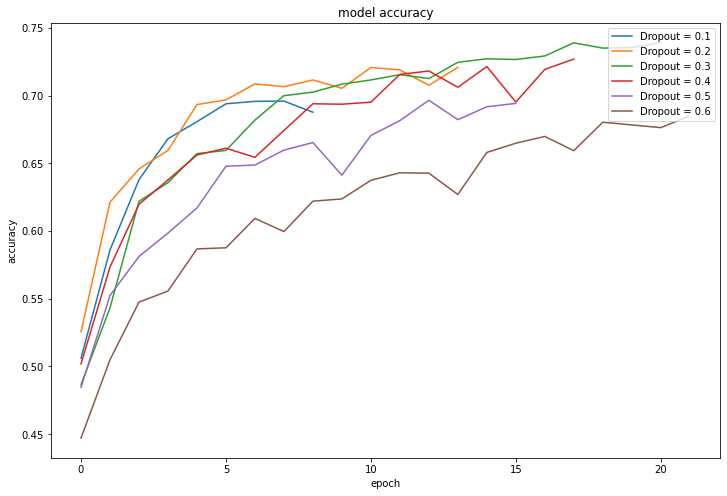

In [286]:
plt.figure(figsize = (12,8))
names = ["Dropout = 0.1","Dropout = 0.2","Dropout = 0.3","Dropout = 0.4","Dropout = 0.5",
         "Dropout = 0.6"]
for i in range(6):
    print("Validation Accuracy of", names[i],"=",max(pd.DataFrame(model[i].history.history)["val_accuracy"]))
    pd.DataFrame(model[i].history.history)["val_accuracy"].plot()
    plt.legend(names, loc='upper right')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')

#### The validation accuracy of the model improved further by implementing Dropout. It looks like introducing Dropout of 0.3 brought significant improvement to the overall validation accuracy of the model #3

### Summary:

We were able to improve the validation accuracy along each step, by choosing the best hyperparameter value from a given set of values. Below is the validation accuracy from the best model from each step.

1. Step 1: 67.5%
2. Step 2: 70.2%
3. Step 3: 70.8%
4. Step 4: 73.9%


#### Evaluation Metrics

In [288]:
print(model[2].metrics_names)
print(model[2].evaluate(x_test,y_test_cat))

['loss', 'accuracy']
313/313 [==============================] - 4s 11ms/step - loss: 0.7712 - accuracy: 0.7390
[0.7712311744689941, 0.7390000224113464]


In [176]:
from sklearn.metrics import classification_report, confusion_matrix

In [302]:
predict = model[2].predict(x_test)
predictions = np.argmax(predict,axis = 1)

In [303]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1095
           1       0.85      0.87      0.86       974
           2       0.62      0.68      0.65       915
           3       0.55      0.58      0.57       955
           4       0.71      0.72      0.72       989
           5       0.54      0.73      0.62       744
           6       0.84      0.76      0.80      1111
           7       0.78      0.76      0.77      1022
           8       0.86      0.79      0.82      1093
           9       0.83      0.75      0.79      1102

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



Text(0.5, 1.0, 'Confusion Matrix')

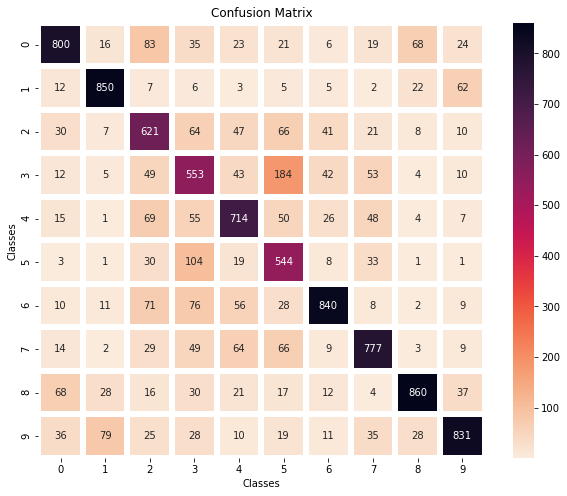

In [304]:
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix(predictions,y_test),annot=True,cmap = "rocket_r",fmt = "g",linewidths=5)
plt.xlabel("Classes")
plt.ylabel("Classes")
plt.title("Confusion Matrix")

### Predicting a given image

CIFAR-10 Dataset Classes

0: Airplane<br>
1: Automobile<br>
2: Bird<br>
3: Cat<br>
4: Deer<br>
5: Dog<br>
6: Frog<br>
7: Horse<br>
8: Ship<br>
9: Truck<br>

In [305]:
my_image = x_test[123].reshape(1,32,32,3)
np.argmax(model[4].predict(my_image),axis=1)

array([2])

In [306]:
y_test[123]

array([2], dtype=uint8)

Our model's prediction is correct!

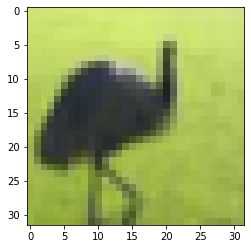

In [312]:
plt.imshow(x_test[123])

In [308]:
pred = pd.DataFrame(predictions,columns=["Prediction"])
labels = pd.DataFrame(y_test,columns=["Label"])

In [309]:
Result = pd.concat([pred,labels],axis=1)

In [310]:
Result

,Prediction,Label
0,8,3
1,8,8
2,8,8
3,0,0
4,6,6
...,...,...
9995,8,8
9996,3,3
9997,5,5
9998,1,1
